In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("D:/restaurant_dataset.csv")
print(data.head(2))

   Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                    Japanese  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is d

In [23]:
data.shape

(9551, 21)

In [21]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [11]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
# Checking missing data
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
# For handling Missing Values Used below Method
data.fillna({'Cuisines':"undefined"},inplace=True)

In [11]:
# Rechecked missing values
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Level1: Data Analysis

## Task1: Top Cuisines
## Determine the top three most common cuisines in the dataset.

In [51]:
Cuisine_count= data['Cuisines'].str.split(', ').explode('Cuisines').value_counts()
print(Cuisine_count)
Top_cuisine=Cuisine_count.head(3)
print("The top three most common cuisines in the dataset are : ",Top_cuisine)


Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B?_rek               1
Name: count, Length: 146, dtype: int64
The top three most common cuisines in the dataset are :  Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


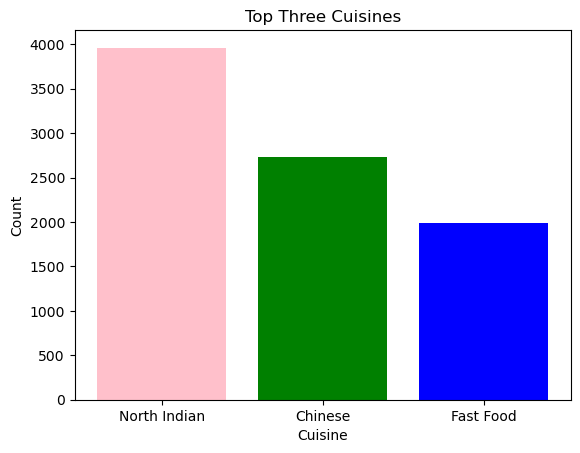

In [179]:
colours = ['pink', 'green', 'blue']
plt.bar(Top_cuisine.index, Top_cuisine.values, color=colours)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top Three Cuisines')
plt.show()

## Calculate the percentage of restaurants that serve each of the top cuisines.


In [121]:
Total_restaurant = len(data)
print("Total Restaurants are:",Total_restaurant)
Top_cuisine5=Cuisine_count.head()
percentages = (Top_cuisine5/ Total_restaurant) * 100
print("The percentage of restaurants that serve each of the top 5 cuisines are : ",percentages)

Total Restaurants are: 9551
The percentage of restaurants that serve each of the top 5 cuisines are :  Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


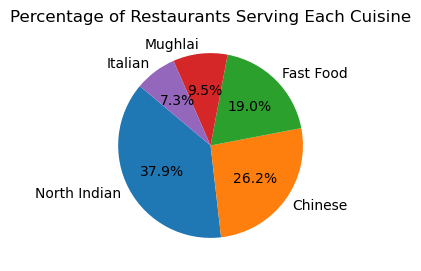

In [175]:
plt.figure(figsize=(3, 3))
labels=['North Indian','Chinese','Fast Food','Mughlai','Italian']
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Percentage of Restaurants Serving Each Cuisine')
plt.show()